In [21]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import *
from sklearn.model_selection import *
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *
import seaborn as sns
import numpy as np
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
import optuna
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('sentimental_data.csv')

In [3]:
df['polarity'].value_counts()

 1.0    4979
 0.0    2950
-1.0    2354
Name: polarity, dtype: int64

<AxesSubplot:xlabel='polarity', ylabel='Count'>

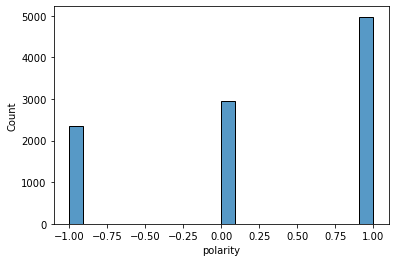

In [4]:
sns.histplot(df['polarity'])

In [11]:
df.dtypes

tweet        object
time         object
polarity    float64
dtype: object

In [5]:
X = df.tweet
y = df.polarity

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=69,test_size=0.2)

In [7]:
tf = TfidfVectorizer()
X_vec = tf.fit_transform(X)
x1_train,x1_test,y1_train,y1_test = train_test_split(X_vec,y,random_state=69,test_size=0.2)
X_vec

<10283x16293 sparse matrix of type '<class 'numpy.float64'>'
	with 188319 stored elements in Compressed Sparse Row format>

In [58]:
svc_pipeline = make_pipeline(TfidfVectorizer(min_df=0.001),LinearSVC(C=0.05))

In [59]:
svc_pipeline.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(min_df=0.001)),
                ('linearsvc', LinearSVC(C=0.05))])

In [60]:
train_pred = svc_pipeline.predict(x_train)
test_pred = svc_pipeline.predict(x_test)
print('Train : \n',classification_report(train_pred,y_train))
print('Test : \n',classification_report(test_pred,y_test))

Train : 
               precision    recall  f1-score   support

        -1.0       0.54      0.89      0.68      1152
         0.0       0.83      0.81      0.82      2433
         1.0       0.92      0.79      0.85      4641

    accuracy                           0.81      8226
   macro avg       0.77      0.83      0.78      8226
weighted avg       0.84      0.81      0.82      8226

Test : 
               precision    recall  f1-score   support

        -1.0       0.44      0.80      0.57       256
         0.0       0.73      0.75      0.74       567
         1.0       0.89      0.72      0.80      1234

    accuracy                           0.74      2057
   macro avg       0.69      0.76      0.70      2057
weighted avg       0.79      0.74      0.75      2057



In [78]:
def objective(trial,x_train,y_train):
    c= trial.suggest_float('C',0,10)
    model = svc_pipeline = make_pipeline(TfidfVectorizer(min_df=0.001),LinearSVC(C=c))
    score = cross_val_score(model,x_train,y_train,n_jobs=-1,cv=3,scoring='f1_macro')
    ap = score.mean()
    return ap

In [79]:
study = optuna.create_study(direction='maximize',study_name='xgb')
func = lambda trial: objective(trial, x_train, y_train)
study.optimize(func,n_trials=100,n_jobs=-1)

[I 2022-04-25 20:43:11,546] A new study created in memory with name: xgb
[I 2022-04-25 20:43:12,053] Trial 9 finished with value: 0.7591270661926343 and parameters: {'C': 7.597226060314791}. Best is trial 9 with value: 0.7591270661926343.
[I 2022-04-25 20:43:12,200] Trial 2 finished with value: 0.7746294382927088 and parameters: {'C': 1.954250875892386}. Best is trial 2 with value: 0.7746294382927088.
[I 2022-04-25 20:43:12,431] Trial 0 finished with value: 0.7691686583586891 and parameters: {'C': 3.7394802156117657}. Best is trial 2 with value: 0.7746294382927088.
[I 2022-04-25 20:43:12,524] Trial 6 finished with value: 0.7710826711334708 and parameters: {'C': 0.4963548007527896}. Best is trial 2 with value: 0.7746294382927088.
[I 2022-04-25 20:43:12,633] Trial 3 finished with value: 0.7635184707856199 and parameters: {'C': 5.7287722837651325}. Best is trial 2 with value: 0.7746294382927088.
[I 2022-04-25 20:43:12,652] Trial 7 finished with value: 0.7772608017518917 and parameters: {'

[I 2022-04-25 20:43:15,775] Trial 45 finished with value: 0.7772608017518917 and parameters: {'C': 1.1453617580426396}. Best is trial 42 with value: 0.7777371749895198.
[I 2022-04-25 20:43:15,809] Trial 46 finished with value: 0.7772320287105376 and parameters: {'C': 1.0623809878496102}. Best is trial 42 with value: 0.7777371749895198.
[I 2022-04-25 20:43:15,925] Trial 47 finished with value: 0.7763126609030069 and parameters: {'C': 1.037624421865695}. Best is trial 42 with value: 0.7777371749895198.
[I 2022-04-25 20:43:15,997] Trial 48 finished with value: 0.7754046668533886 and parameters: {'C': 0.9436502770059808}. Best is trial 42 with value: 0.7777371749895198.
[I 2022-04-25 20:43:16,046] Trial 49 finished with value: 0.7767073755359251 and parameters: {'C': 1.1242530585090043}. Best is trial 42 with value: 0.7777371749895198.
[I 2022-04-25 20:43:16,096] Trial 50 finished with value: 0.7764294168824932 and parameters: {'C': 1.0416969223024115}. Best is trial 42 with value: 0.77773

[I 2022-04-25 20:43:19,084] Trial 92 finished with value: 0.776499444334423 and parameters: {'C': 1.3461974533668308}. Best is trial 42 with value: 0.7777371749895198.
[I 2022-04-25 20:43:19,157] Trial 90 finished with value: 0.7606975333035831 and parameters: {'C': 6.906079334574127}. Best is trial 42 with value: 0.7777371749895198.
[I 2022-04-25 20:43:19,186] Trial 91 finished with value: 0.7602309359543495 and parameters: {'C': 7.208659949342216}. Best is trial 42 with value: 0.7777371749895198.
[I 2022-04-25 20:43:19,328] Trial 93 finished with value: 0.7768121807700578 and parameters: {'C': 1.2952807033230518}. Best is trial 42 with value: 0.7777371749895198.
[I 2022-04-25 20:43:19,369] Trial 94 finished with value: 0.7767691354088676 and parameters: {'C': 1.3536066777680487}. Best is trial 42 with value: 0.7777371749895198.
[I 2022-04-25 20:43:19,558] Trial 95 finished with value: 0.7603983534675574 and parameters: {'C': 6.94182550803698}. Best is trial 42 with value: 0.777737174

In [80]:
study.best_params

{'C': 1.1666138614082024}

In [81]:
svc_pipeline = make_pipeline(TfidfVectorizer(min_df=0.001),LinearSVC(C=1.166))
svc_pipeline.fit(x_train,y_train)
train_pred = svc_pipeline.predict(x_train)
test_pred = svc_pipeline.predict(x_test)
print('Train : \n',classification_report(train_pred,y_train))
print('Test : \n',classification_report(test_pred,y_test))

Train : 
               precision    recall  f1-score   support

        -1.0       0.82      0.92      0.87      1689
         0.0       0.97      0.91      0.94      2522
         1.0       0.95      0.94      0.94      4015

    accuracy                           0.92      8226
   macro avg       0.91      0.92      0.92      8226
weighted avg       0.93      0.92      0.93      8226

Test : 
               precision    recall  f1-score   support

        -1.0       0.67      0.78      0.72       405
         0.0       0.88      0.83      0.85       618
         1.0       0.88      0.86      0.87      1034

    accuracy                           0.83      2057
   macro avg       0.81      0.82      0.81      2057
weighted avg       0.84      0.83      0.84      2057



In [89]:
cvs = cross_val_score(svc_pipeline,x_train,y_train,cv=3,n_jobs=-1,scoring='f1_macro').mean()
cvs

0.7777371749895198

In [15]:
rfc_pipeline = make_pipeline(TfidfVectorizer(min_df=0.001),RandomForestClassifier(n_estimators=200,max_depth=70))
rfc_pipeline.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(min_df=0.001)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=70, n_estimators=200))])

In [18]:
rfc_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidfvectorizer', 'randomforestclassifier', 'tfidfvectorizer__analyzer', 'tfidfvectorizer__binary', 'tfidfvectorizer__decode_error', 'tfidfvectorizer__dtype', 'tfidfvectorizer__encoding', 'tfidfvectorizer__input', 'tfidfvectorizer__lowercase', 'tfidfvectorizer__max_df', 'tfidfvectorizer__max_features', 'tfidfvectorizer__min_df', 'tfidfvectorizer__ngram_range', 'tfidfvectorizer__norm', 'tfidfvectorizer__preprocessor', 'tfidfvectorizer__smooth_idf', 'tfidfvectorizer__stop_words', 'tfidfvectorizer__strip_accents', 'tfidfvectorizer__sublinear_tf', 'tfidfvectorizer__token_pattern', 'tfidfvectorizer__tokenizer', 'tfidfvectorizer__use_idf', 'tfidfvectorizer__vocabulary', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestcl

In [20]:
def objective(trial,x_train,y_train):
    n = trial.suggest_int('randomforestclassifier__n_estimators',10,1000)
    md = trial.suggest_int('randomforestclassifier__max_depth',10,1000)
    model = make_pipeline(TfidfVectorizer(min_df=0.001),RandomForestClassifier(n_estimators=n, max_depth=md))
    score = cross_val_score(model,x_train,y_train,n_jobs=-1,cv=3,scoring='f1_macro')
    ap = score.mean()
    return ap

study = optuna.create_study(direction='maximize',study_name='xgb')
func = lambda trial: objective(trial, x_train, y_train)
study.optimize(func,n_trials=100,n_jobs=-1)

[I 2022-04-26 09:23:51,115] A new study created in memory with name: xgb
[I 2022-04-26 09:23:55,130] Trial 3 finished with value: 0.6859063502753214 and parameters: {'randomforestclassifier__n_estimators': 133, 'randomforestclassifier__max_depth': 114}. Best is trial 3 with value: 0.6859063502753214.
[I 2022-04-26 09:23:56,507] Trial 1 finished with value: 0.686027011518973 and parameters: {'randomforestclassifier__n_estimators': 172, 'randomforestclassifier__max_depth': 189}. Best is trial 1 with value: 0.686027011518973.
[I 2022-04-26 09:24:11,408] Trial 9 finished with value: 0.6849725806406054 and parameters: {'randomforestclassifier__n_estimators': 256, 'randomforestclassifier__max_depth': 463}. Best is trial 1 with value: 0.686027011518973.
[I 2022-04-26 09:24:15,432] Trial 10 finished with value: 0.6935788817642922 and parameters: {'randomforestclassifier__n_estimators': 78, 'randomforestclassifier__max_depth': 370}. Best is trial 10 with value: 0.6935788817642922.
[I 2022-04-26

[I 2022-04-26 09:26:13,342] Trial 34 finished with value: 0.6874953353290517 and parameters: {'randomforestclassifier__n_estimators': 968, 'randomforestclassifier__max_depth': 584}. Best is trial 10 with value: 0.6935788817642922.
[I 2022-04-26 09:26:19,012] Trial 36 finished with value: 0.6866172215985297 and parameters: {'randomforestclassifier__n_estimators': 981, 'randomforestclassifier__max_depth': 557}. Best is trial 10 with value: 0.6935788817642922.
[I 2022-04-26 09:26:19,325] Trial 35 finished with value: 0.6888010403158112 and parameters: {'randomforestclassifier__n_estimators': 1000, 'randomforestclassifier__max_depth': 578}. Best is trial 10 with value: 0.6935788817642922.
[I 2022-04-26 09:26:35,960] Trial 37 finished with value: 0.6880116631095321 and parameters: {'randomforestclassifier__n_estimators': 985, 'randomforestclassifier__max_depth': 565}. Best is trial 10 with value: 0.6935788817642922.
[I 2022-04-26 09:26:44,264] Trial 38 finished with value: 0.687704449713041

[I 2022-04-26 09:29:29,537] Trial 67 finished with value: 0.6869340404170831 and parameters: {'randomforestclassifier__n_estimators': 903, 'randomforestclassifier__max_depth': 472}. Best is trial 10 with value: 0.6935788817642922.
[I 2022-04-26 09:29:32,130] Trial 68 finished with value: 0.6875774704013705 and parameters: {'randomforestclassifier__n_estimators': 741, 'randomforestclassifier__max_depth': 463}. Best is trial 10 with value: 0.6935788817642922.
[I 2022-04-26 09:29:46,339] Trial 70 finished with value: 0.6883576628158216 and parameters: {'randomforestclassifier__n_estimators': 765, 'randomforestclassifier__max_depth': 208}. Best is trial 10 with value: 0.6935788817642922.
[I 2022-04-26 09:29:50,704] Trial 71 finished with value: 0.6837349943436455 and parameters: {'randomforestclassifier__n_estimators': 726, 'randomforestclassifier__max_depth': 164}. Best is trial 10 with value: 0.6935788817642922.
[I 2022-04-26 09:29:54,585] Trial 72 finished with value: 0.6846300253969059

In [16]:
train_pred = rfc_pipeline.predict(x_train)
test_pred = rfc_pipeline.predict(x_test)
print('Train : \n',classification_report(train_pred,y_train))
print('Test : \n',classification_report(test_pred,y_test))

Train : 
               precision    recall  f1-score   support

        -1.0       0.94      1.00      0.97      1778
         0.0       1.00      0.93      0.96      2553
         1.0       0.98      1.00      0.99      3895

    accuracy                           0.98      8226
   macro avg       0.97      0.98      0.97      8226
weighted avg       0.98      0.98      0.98      8226

Test : 
               precision    recall  f1-score   support

        -1.0       0.40      0.84      0.54       225
         0.0       0.78      0.76      0.77       594
         1.0       0.89      0.72      0.80      1238

    accuracy                           0.75      2057
   macro avg       0.69      0.78      0.71      2057
weighted avg       0.81      0.75      0.76      2057

